In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
url= 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'

In [4]:
df=pd.read_csv(url)

In [5]:
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     37250 non-null  int64 
 1   gender  37250 non-null  object
 2   split   37250 non-null  object
 3   final   37250 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [8]:

df.columns

Index(['age', 'gender', 'split', 'final'], dtype='object')

In [9]:
# Konvertiere 'split' und 'final' in datetime-Format
df['split'] = pd.to_datetime(df['split'], format='%H:%M:%S')
df['final'] = pd.to_datetime(df['final'], format='%H:%M:%S')
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     37250 non-null  int64         
 1   gender  37250 non-null  object        
 2   split   37250 non-null  datetime64[ns]
 3   final   37250 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.1+ MB
       age gender               split               final
0       33      M 1900-01-01 01:05:38 1900-01-01 02:08:51
1       32      M 1900-01-01 01:06:26 1900-01-01 02:09:28
2       31      M 1900-01-01 01:06:49 1900-01-01 02:10:42
3       38      M 1900-01-01 01:06:16 1900-01-01 02:13:45
4       31      M 1900-01-01 01:06:32 1900-01-01 02:13:59
...    ...    ...                 ...                 ...
37245   18      M 1900-01-01 04:24:24 1900-01-01 09:32:57
37246   36      M 1900-01-01 04:35:43 1900-01-01 09:33:28
37247   51      M 1900-01-01 04:22:35

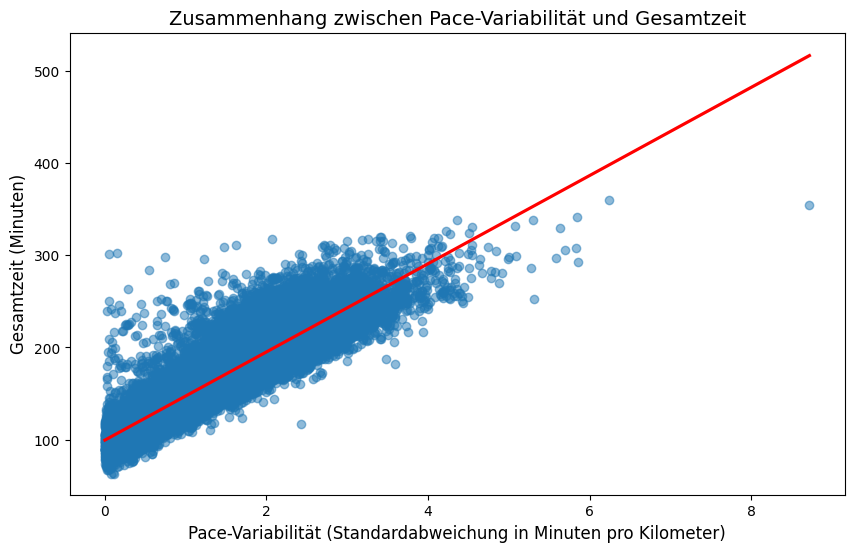

In [12]:
# Annahme: Die Streckenlänge beträgt 21,1 km (Halbmarathon)
distance_km = 21.1

# Konvertiere die Zeit-Spalten in datetime-Objekte
df['split'] = pd.to_datetime(df['split'], format='%H:%M:%S')
df['final'] = pd.to_datetime(df['final'], format='%H:%M:%S')

# Berechne die Gesamtzeit in Minuten
df['total_time_min'] = (df['final'] - df['split']).dt.total_seconds() / 60

# Berechne die Pace (Minuten pro Kilometer) für die erste Hälfte (split) und die zweite Hälfte (final - split)
df['split_pace'] = (df['split'].dt.hour * 60 + df['split'].dt.minute + df['split'].dt.second / 60) / (distance_km / 2)
df['final_pace'] = (df['final'].dt.hour * 60 + df['final'].dt.minute + df['final'].dt.second / 60) / distance_km

# Berechne die Pace-Variabilität (Standardabweichung zwischen split_pace und final_pace)
df['pace_variability'] = df[['split_pace', 'final_pace']].std(axis=1)

# Scatterplot mit Trendlinie
plt.figure(figsize=(10, 6))
sns.regplot(x='pace_variability', y='total_time_min', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Zusammenhang zwischen Pace-Variabilität und Gesamtzeit', fontsize=14)
plt.xlabel('Pace-Variabilität (Standardabweichung in Minuten pro Kilometer)', fontsize=12)
plt.ylabel('Gesamtzeit (Minuten)', fontsize=12)
plt.show()

C:\Users\Donat\AppData\Local\Temp\ipykernel_8816\312936952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='pace_variability', data=df, palette='Set2')


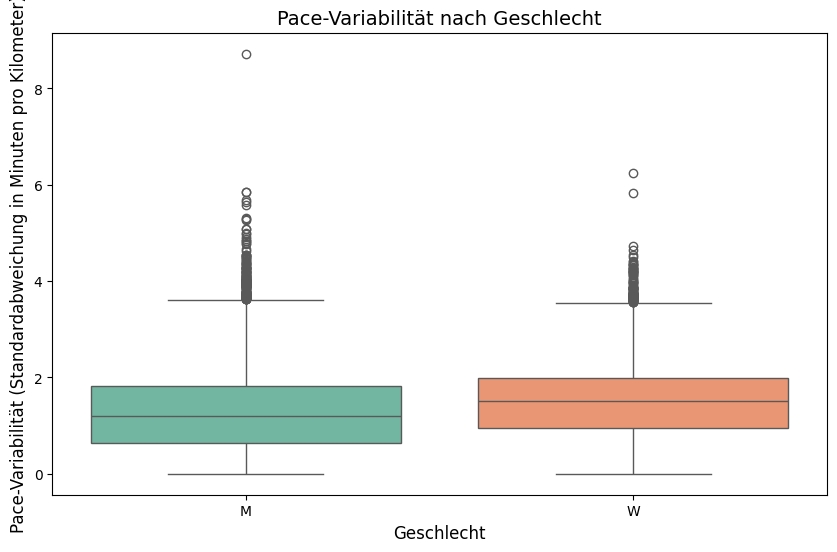

In [13]:

# Boxplot: Pace-Variabilität nach Geschlecht
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='pace_variability', data=df, palette='Set2')
plt.title('Pace-Variabilität nach Geschlecht', fontsize=14)
plt.xlabel('Geschlecht', fontsize=12)
plt.ylabel('Pace-Variabilität (Standardabweichung in Minuten pro Kilometer)', fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

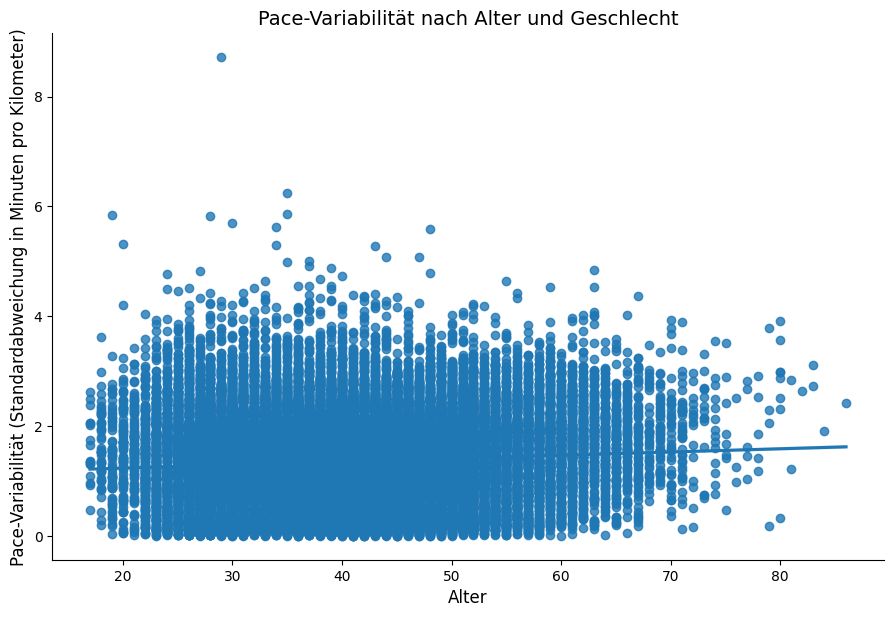

In [15]:

# Scatterplot: Pace-Variabilität nach Alter mit Trendlinien
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='pace_variability', data=df, palette='Set2', height=6, aspect=1.5)
plt.title('Pace-Variabilität nach Alter und Geschlecht', fontsize=14)
plt.xlabel('Alter', fontsize=12)
plt.ylabel('Pace-Variabilität (Standardabweichung in Minuten pro Kilometer)', fontsize=12)
plt.show()

Korrelation zwischen Pace-Variabilität und Gesamtzeit: 0.83


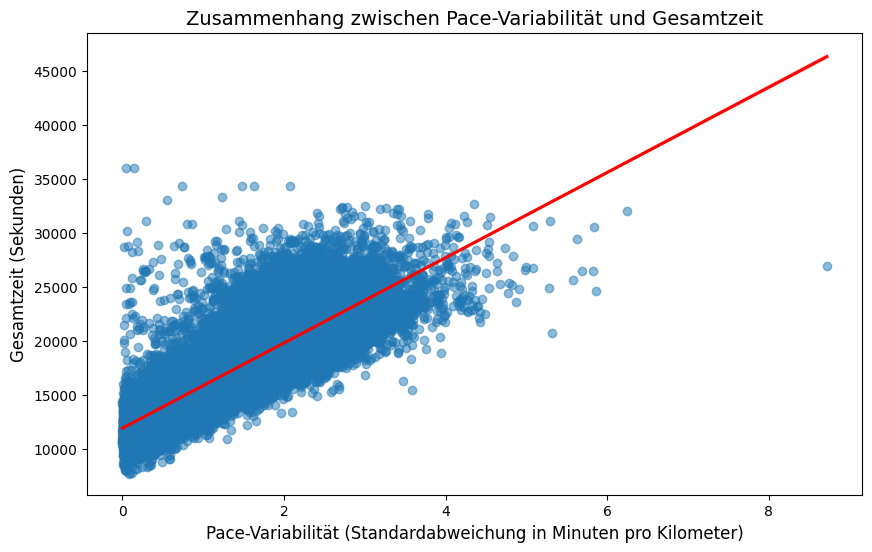

In [19]:

# Annahme: Die Streckenlänge beträgt 21,1 km (Halbmarathon)
distance_km = 21.1

# Konvertiere die Zeit-Spalten in datetime-Objekte
df['split'] = pd.to_datetime(df['split'], format='%H:%M:%S')
df['final'] = pd.to_datetime(df['final'], format='%H:%M:%S')

# Berechne die Gesamtzeit in Sekunden
df['total_time_sec'] = df['final'].dt.hour * 3600 + df['final'].dt.minute * 60 + df['final'].dt.second

# Berechne die Pace (Minuten pro Kilometer) für die erste Hälfte (split) und die zweite Hälfte (final - split)
df['split_pace'] = (df['split'].dt.hour * 60 + df['split'].dt.minute + df['split'].dt.second / 60) / (distance_km / 2)
df['final_pace'] = (df['final'].dt.hour * 60 + df['final'].dt.minute + df['final'].dt.second / 60) / distance_km

# Berechne die Pace-Variabilität (Standardabweichung zwischen split_pace und final_pace)
df['pace_variability'] = df[['split_pace', 'final_pace']].std(axis=1)

# Manuelle Berechnung der Pearson-Korrelation
def pearson_correlation(x, y):
    # Mittelwert von x und y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Kovarianz
    covariance = np.sum((x - mean_x) * (y - mean_y))
    
    # Standardabweichungen
    std_x = np.sqrt(np.sum((x - mean_x) ** 2))
    std_y = np.sqrt(np.sum((y - mean_y) ** 2))
    
    # Pearson-Korrelation
    correlation = covariance / (std_x * std_y)
    return correlation

# Berechne die Korrelation zwischen Pace-Variabilität und Gesamtzeit
correlation = pearson_correlation(df['pace_variability'], df['total_time_sec'])
print(f"Korrelation zwischen Pace-Variabilität und Gesamtzeit: {correlation:.2f}")

# Scatterplot: Zusammenhang zwischen Pace-Variabilität und Gesamtzeit
plt.figure(figsize=(10, 6))
sns.regplot(x='pace_variability', y='total_time_sec', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Zusammenhang zwischen Pace-Variabilität und Gesamtzeit', fontsize=14)
plt.xlabel('Pace-Variabilität (Standardabweichung in Minuten pro Kilometer)', fontsize=12)
plt.ylabel('Gesamtzeit (Sekunden)', fontsize=12)
plt.show()